In [37]:
#単回帰分析
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model

In [56]:
iris = pd.read_csv('iris.csv')

In [40]:
#データ加工
setosa = iris[iris["variety"] == "Setosa"]
versicolor = iris[iris["variety"] == "Versicolor"]
Virginica = iris[iris["variety"] == "Virginica"]


In [44]:
X = setosa[["sepal.length"]]
Y = setosa[["sepal.width"]]

LinerRegr = linear_model.LinearRegression()
LinerRegr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

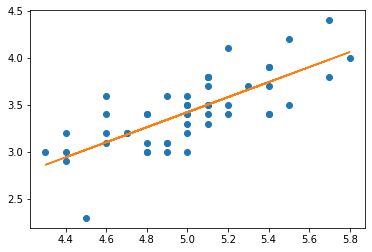

モデル関数の回帰変数 w1: 0.799
モデル関数の切片 w2: -0.569
y= 0.799x + -0.569
決定係数 R^2：  0.5513755803923135


In [48]:
plt.plot(X, Y, 'o')
plt.plot(X, LinerRegr.predict(X), linestyle="solid")
plt.show()

print('モデル関数の回帰変数 w1: %.3f' %LinerRegr.coef_)
print('モデル関数の切片 w2: %.3f' %LinerRegr.intercept_)
print('y= %.3fx + %.3f' % (LinerRegr.coef_ , LinerRegr.intercept_))
print('決定係数 R^2： ', LinerRegr.score(X, Y))

In [49]:
# 重回帰分析　xを複数列選択するだけ
X = setosa[["sepal.length", "petal.length", "petal.width"]]
Y = setosa[["sepal.width"]]

LinerRegr = linear_model.LinearRegression()
LinerRegr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print('決定係数 R^2： ', LinerRegr.score(X, Y))

決定係数 R^2：  0.5530382150991422


In [57]:
# カテゴリー変数も考慮したい場合はダミー変数を用意する

# ダミー変数を用意
dummies = pd.get_dummies(iris["variety"])
iris = pd.concat([iris, dummies], axis = 1)

In [60]:
X = iris[["Virginica", "Versicolor"]]
Y = iris[["sepal.length"]]

LinerRegr = linear_model.LinearRegression()
LinerRegr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
print(LinerRegr.coef_)
print(LinerRegr.intercept_)
#print('y= %.3fx + %.3f' % (LinerRegr.coef_ , LinerRegr.intercept_))
print('決定係数 R^2： ', LinerRegr.score(X, Y))

[[1.582 0.93 ]]
[5.006]
決定係数 R^2：  0.6187057307384871


In [68]:
#StatsModelsで重回帰分析
import statsmodels.api as sm

model = sm.OLS(Y, X)

In [69]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           sepal.length   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              225.2
Date:                Mon, 07 Jun 2021   Prob (F-statistic):                    1.26e-45
Time:                        06:22:50   Log-Likelihood:                         -374.34
No. Observations:                 150   AIC:                                      752.7
Df Residuals:                     148   BIC:                                      758.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Virginica      6.5880      0.418     15.767      0.000       5.762       7.414
Versicolor     5.9360      0.418     14.206      0.000       5.110       6.762
==============================================================================
Omnibus:                      352.367   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.314
Skew:                           0.612   Prob(JB):                     1.43e-05
Kurtosis:                       1.561   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""